In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
# Import the Dataset
review_dataset = pd.read_csv("yelp.csv")

In [3]:
review_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [4]:
review_dataset.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
review_dataset["type"].nunique()

1

In [6]:
review_dataset["Length"] = review_dataset["text"].apply(len)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD8C0D2358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002BD8C5FCC18>]], dtype=object)

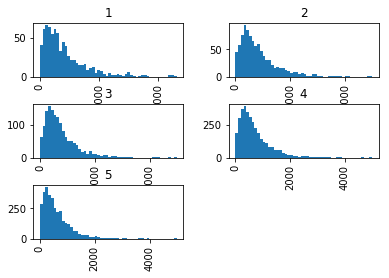

In [7]:
review_dataset.hist(column="Length",by="stars",bins=50)

In [8]:
review_dataset["text"].describe()

count                                                 10000
unique                                                 9998
top       This review is for the chain in general. The l...
freq                                                      2
Name: text, dtype: object

In [9]:
review_dataset.groupby("stars").describe()

Length                                                               \
        count        mean         std   min    25%    50%      75%     max   
stars                                                                        
1       749.0  826.515354  742.929304  11.0  315.0  600.0  1075.00  4618.0   
2       927.0  842.256742  704.079491   7.0  365.5  656.0  1105.00  4972.0   
3      1461.0  758.498289  627.594294   1.0  342.0  599.0   975.00  4975.0   
4      3526.0  712.923142  600.158476   2.0  307.0  551.5   945.75  4997.0   
5      3337.0  624.999101  558.578229   6.0  243.0  471.0   826.00  4986.0   

         cool            ...  funny        useful                           \
        count      mean  ...    75%   max   count      mean       std  min   
stars                    ...                                                 
1       749.0  0.576769  ...    1.0  30.0   749.0  1.604806  2.302354  0.0   
2       927.0  0.719525  ...    1.0  20.0   927.0  1.563107  1.969546  0.0   
3      1461.0  0.788501  ...    1.0  24.0  1461.0  1.306639  1.985327  0.0   
4      3526.0  0.954623  ...    1.0  57.0  3526.0  1.395916  2.236087  0.0   
5      3337.0  0.944261  ...    1.0  39.0  3337.0  1.381780  2.659065  0.0   

                            
       25%  50%  75%   max  
stars                       
1      0.0  1.0  2.0  20.0  
2      0.0  1.0  2.0  17.0  
3      0.0  1.0  2.0  19.0  
4      0.0  1.0  2.0  38.0  
5      0.0  1.0  2.0  76.0  

[5 rows x 32 columns]

In [10]:
features = review_dataset.iloc[:,4].values
label = review_dataset.stars.values.reshape(-1,1)

In [11]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(features,label,test_size=0.2,random_state=0)

In [12]:
import string
def text_process(message):
    message = [char for char in message if char not in string.punctuation]
    message = ''.join(message)
    return [word for word in message.split() if word.lower() not in stopwords.words("english")]

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
pipeline_object = Pipeline([("bow",CountVectorizer(analyzer=text_process)),("tfidf",TfidfTransformer()),("classifier",MultinomialNB())])

In [ ]:
pipeline_object.fit(X_train,y_train)

In [ ]:
import pickle
pickle.dump(pipeline_object,open("ReviewModel.model","wb"))